# Cvičení

## Basketbal

Stáhni si dataset `nba.csv`, který informace o začátečnících v basketballové soutěži NBA. 

Výstupní proměnná je označená jako `TARGET_5Yrs`, která určuje, jestli byl hráč aktivní i po 5 letech.



In [8]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

- Vyřaď z dataset proměnnou `Name`.


In [9]:
data = pandas.read_csv("nba_logreg.csv")
data = data.drop(columns="Name")
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


- Načti si data do proměnných `X` a `y`


In [10]:
X = data.drop(columns=["TARGET_5Yrs"])
y = data["TARGET_5Yrs"]

- Rozděl data na trénovací a testovací (velikost testovacích dat nastav na 30% a nezapomeň nastavit proměnnou `random_state=42`, aby tvoje výsledky byly reprodukovatelné)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Pokud použijeme stejný algoritmus jako v lekci, tj. `KNeighborsClassifier` s výchozím počtem uvažovaných "sousedů".


In [16]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

- Vytvoř si matici záměn a na základě poskytnutých čísel zkus vypočítat metriky _Precision_ a _Recall_. Následně si výsledky svého výpočtu ověř s využitím funkcí modulu `scikit-learn`.

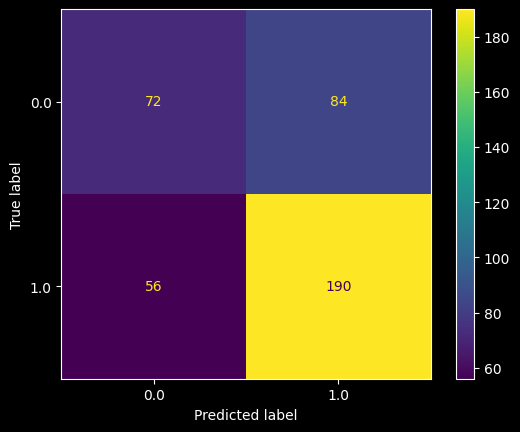

In [14]:
ConfusionMatrixDisplay.from_estimator(
    clf,  # klasifikator
    X_test,
    y_test,
    display_labels=clf.classes_,
)

In [15]:
190 / (190 + 84)

0.6934306569343066

In [4]:
precision_score(y_test, y_pred)

0.6934306569343066

In [5]:
190 / (190 + 56)

0.7723577235772358

In [6]:
recall_score(y_test, y_pred)

0.7723577235772358

- Uvažuj, že jsi v roli pracovníka agentury, která pomáhá nadějným začínajícím hráčům. Pro tebe jako pro pracovníka agentury je velmi důležité nepropásnout nějaký nový talent. Pokud nabídneš spolupráci někomu, kdo pak neuspěje, tolik to nevadí. Zkus najít hodnotu parametru `n_neighbors`, která maximalizuje ideání metriku pro pracovníka agentury. K nalezení optimální metriky použij graf.

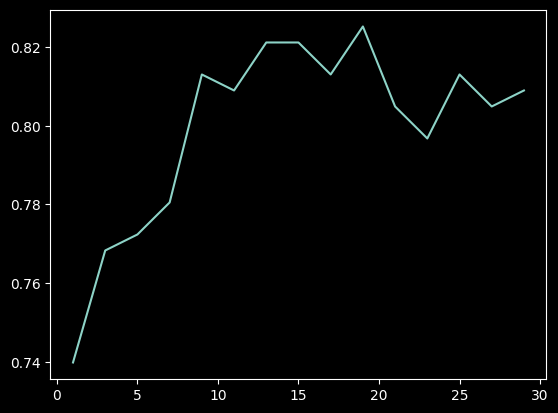

In [7]:
from sklearn.metrics import accuracy_score

ks = range(1, 31, 2)
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(recall_score(y_test, y_pred))
plt.plot(ks, accuracy_scores)